# Combined Exon and Gene Methylation Analysis

This document presents a comprehensive analysis of exon and gene methylation, including:
- Histograms and heatmaps of exon positions by methylation level
- Exon and gene methylation density by individual and season
- Correlation plots of gene expression and methylation
- Coefficient of variation (CV) of expression vs. mean methylation (gene and exon)

All code and plots are included for reproducibility and blog post preparation.

## Import Required Libraries
We will use pandas, numpy, matplotlib, seaborn, and re for data analysis and visualization.

# Combined Exon and Gene Methylation Analysis

This document presents a comprehensive analysis of exon and gene methylation, including:
- Histograms and heatmaps of exon positions by methylation level
- Exon and gene methylation density by individual and season
- Correlation plots of gene expression and methylation
- Coefficient of variation (CV) of expression vs. mean methylation (gene and exon)

All code and plots are included for reproducibility and blog post preparation.

## Import Required Libraries
We will use pandas, numpy, matplotlib, seaborn, and re for data analysis and visualization.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
{bash}

#create bed files from gffs

awk -F "\t" '{if($3!="")print $1"\t"$4"\t"$5"\t"$9}' Porites_evermanni_validated.gff3 > Porites_evermanni_validated.gff.bed

awk -F "\t" '{if($3!="")print $1"\t"$4"\t"$5"\t"$9}' Pocillopora_meandrina_HIv1.genes-validated.gff > Pocillopora_meandrina_HIv1.gff.bed

awk -F "\t" '{if($3!="")print $1"\t"$4"\t"$5"\t"$3";"$9}' Apulcra-genome.gff > Apulcra-genome.gff.bed

#create 10x perc methylation files for each sample for each species. This code matches CpGs to features in the gff bed file and only keeps loci that have >= 10 counts. And then it sums all unmethylated loci within a feature, and sums all methylated loci within a feature, and calculates % methylation from that.

#for Peve
for f in *.CpG_report.merged_CpG_evidence.cov.gz
do
    base=$(basename "$f" .CpG_report.merged_CpG_evidence.cov.gz)
    echo "Processing $base..."

    intersectBed -wa -wb -a /gscratch/srlab/strigg/GENOMES/Porites_evermanni_validated.gff.bed -b $f | awk '{if($9+$10>=10)print $0}' | awk '{g = $4;meth[g] += $9;unmeth[g] += $10}END{for(g in meth){total = meth[g] + unmeth[g];pct = (meth[g] / total * 100);print g"\t"meth[g]"\t"unmeth[g]"\t"pct}}' > "${base}_perc_meth.txt"
done

#for Ptua
for f in *.CpG_report.merged_CpG_evidence.cov.gz
do
    base=$(basename "$f" .CpG_report.merged_CpG_evidence.cov.gz)
    echo "Processing $base..."

    intersectBed -wa -wb -a /gscratch/srlab/strigg/GENOMES/Pocillopora_meandrina_HIv1.gff.bed -b $f | awk '{if($9+$10>=10)print $0}' | awk '{g = $4;meth[g] += $9;unmeth[g] += $10}END{for(g in meth){total = meth[g] + unmeth[g];pct = (meth[g] / total * 100);print g"\t"meth[g]"\t"unmeth[g]"\t"pct}}' > "${base}_perc_meth.txt"
done

#for Apulcra
for f in *.CpG_report.merged_CpG_evidence.cov.gz
do
    base=$(basename "$f" .CpG_report.merged_CpG_evidence.cov.gz)
    echo "Processing $base..."

    intersectBed -wa -wb -a /gscratch/srlab/strigg/GENOMES/Apulcra-genome.gff.bed -b $f | awk '{if($9+$10>=10)print $0}' | awk '{g = $4;meth[g] += $9;unmeth[g] += $10}END{for(g in meth){total = meth[g] + unmeth[g];pct = (meth[g] / total * 100);print g"\t"meth[g]"\t"unmeth[g]"\t"pct}}' > "${base}_perc_meth.txt"
done

# Merge all perc_meth.txt files, filtering for ID=gene

echo "Merging files..."
for f in *_perc_meth.txt
do
    base=$(basename "$f" _perc_meth.txt)
    grep "gene;" "$f" | awk -v sample="$base" '{print sample"\t"$1"\t"$4}'
done | awk '{
    sample=$1;
    gene=$2;
    val=$3;
    if(!seen[sample]) {
        samples[++n]=sample;
        seen[sample]=1;
    }
    data[gene][sample]=val;
    genes[gene]=1;
}
END {
    printf "gene";
    for(i=1; i<=n; i++) printf "\t%s", samples[i];
    printf "\n";
    for(gene in genes) {
        printf "%s", gene;
        for(i=1; i<=n; i++) {
            printf "\t%s", (data[gene][samples[i]] ? data[gene][samples[i]] : "NA");
        }
        printf "\n";
    }
}' > Apul_merged_perc_meth.txt

echo "Done! Output in Apul_merged_perc_meth.txt"

#### Exons

echo "Merging files..."
for f in *_perc_meth.txt
do
    base=$(basename "$f" _perc_meth.txt)
    grep "exon;" "$f" | awk -v sample="$base" '{print sample"\t"$1"\t"$4}'
done | awk '{
    sample=$1;
    gene=$2;
    val=$3;
    if(!seen[sample]) {
        samples[++n]=sample;
        seen[sample]=1;
    }
    data[gene][sample]=val;
    genes[gene]=1;
}
END {
    printf "gene";
    for(i=1; i<=n; i++) printf "\t%s", samples[i];
    printf "\n";
    for(gene in genes) {
        printf "%s", gene;
        for(i=1; i<=n; i++) {
            printf "\t%s", (data[gene][samples[i]] ? data[gene][samples[i]] : "NA");
        }
        printf "\n";
    }
}' > Apul_exon_merged_perc_meth.txt

echo "Done! Output in Apul_exon_merged_perc_meth.txt"






### Peve #####


echo "Merging files..."
for f in *_perc_meth.txt
do
    base=$(basename "$f" _perc_meth.txt)
    grep "ID=gene" "$f" | awk -v sample="$base" '{print sample"\t"$1"\t"$4}'
done | awk '{
    sample=$1;
    gene=$2;
    val=$3;
    if(!seen[sample]) {
        samples[++n]=sample;
        seen[sample]=1;
    }
    data[gene][sample]=val;
    genes[gene]=1;
}
END {
    printf "gene";
    for(i=1; i<=n; i++) printf "\t%s", samples[i];
    printf "\n";
    for(gene in genes) {
        printf "%s", gene;
        for(i=1; i<=n; i++) {
            printf "\t%s", (data[gene][samples[i]] ? data[gene][samples[i]] : "NA");
        }
        printf "\n";
    }
}' > Peve_merged_perc_meth.txt

echo "Done! Output in Peve_merged_perc_meth.txt"

--------------------
### Exons ###

echo "Merging files..."
for f in *_perc_meth.txt
do
    base=$(basename "$f" _perc_meth.txt)
    grep "ID=exon" "$f" | awk -v sample="$base" '{print sample"\t"$1"\t"$4}'
done | awk '{
    sample=$1;
    gene=$2;
    val=$3;
    if(!seen[sample]) {
        samples[++n]=sample;
        seen[sample]=1;
    }
    data[gene][sample]=val;
    genes[gene]=1;
}
END {
    printf "gene";
    for(i=1; i<=n; i++) printf "\t%s", samples[i];
    printf "\n";
    for(gene in genes) {
        printf "%s", gene;
        for(i=1; i<=n; i++) {
            printf "\t%s", (data[gene][samples[i]] ? data[gene][samples[i]] : "NA");
        }
        printf "\n";
    }
}' > Peve_exon_merged_perc_meth.txt

echo "Done!"


---------------------

echo "Merging files..."
for f in *_perc_meth.txt
do
    base=$(basename "$f" _perc_meth.txt)
    grep "ID=gene" "$f" | awk -v sample="$base" '{print sample"\t"$1"\t"$4}'
done | awk '{
    sample=$1;
    gene=$2;
    val=$3;
    if(!seen[sample]) {
        samples[++n]=sample;
        seen[sample]=1;
    }
    data[gene][sample]=val;
    genes[gene]=1;
}
END {
    printf "gene";
    for(i=1; i<=n; i++) printf "\t%s", samples[i];
    printf "\n";
    for(gene in genes) {
        printf "%s", gene;
        for(i=1; i<=n; i++) {
            printf "\t%s", (data[gene][samples[i]] ? data[gene][samples[i]] : "NA");
        }
        printf "\n";
    }
}' > Ptua_merged_perc_meth.txt

echo "Done! Output in Ptua_merged_perc_meth.txt"

----------------------

for f in *_perc_meth.txt
do
    base=$(basename "$f" _perc_meth.txt)
    grep "ID=exon" "$f" | awk -v sample="$base" '{print sample"\t"$1"\t"$4}'
done | awk '{
    sample=$1;
    gene=$2;
    val=$3;
    if(!seen[sample]) {
        samples[++n]=sample;
        seen[sample]=1;
    }
    data[gene][sample]=val;
    genes[gene]=1;
}
END {
    printf "gene";
    for(i=1; i<=n; i++) printf "\t%s", samples[i];
    printf "\n";
    for(gene in genes) {
        printf "%s", gene;
        for(i=1; i<=n; i++) {
            printf "\t%s", (data[gene][samples[i]] ? data[gene][samples[i]] : "NA");
        }
        printf "\n";
    }
}' > Ptua_exon_merged_perc_meth.txt

-------------------

75% of samples (~1/2 genes)

#Peve
awk '{na_count = 0;for (i = 1; i <= NF; i++) {if ($i == "NA") {na_count++;}}if (na_count <= 9) {print;}}' Peve_merged_perc_meth.txt > Peve_merged_perc_meth_filt75.txt 

awk '{na_count = 0;for (i = 1; i <= NF; i++) {if ($i == "NA") {na_count++;}}if (na_count <= 9) {print;}}' Peve_exon_merged_perc_meth.txt > Peve_exon_merged_perc_meth_filt75.txt 

# Ptua
awk '{na_count = 0;for (i = 1; i <= 33; i++) {if ($i == "NA") {na_count++;}}if (na_count <= 8) {print;}}' your_file.txt

awk '{na_count = 0;for (i = 1; i <= 33; i++) {if ($i == "NA") {na_count++;}}if (na_count <= 8) {print;}}' Ptua_exon_merged_perc_meth.txt > Ptua_exon_merged_perc_meth_filt75.txt

#Apul

awk '{na_count = 0;for (i = 1; i <= NF; i++) {if ($i == "NA") {na_count++;}}if (na_count <= 10) {print;}}' Apul_merged_perc_meth.txt > Apul_merged_perc_meth_filt75.txt 

awk '{na_count = 0;for (i = 1; i <= NF; i++) {if ($i == "NA") {na_count++;}}if (na_count <= 10) {print;}}' Apul_exon_merged_perc_meth.txt > Apul_exon_merged_perc_meth_filt75.txt 



10K genes recip blast on mosaic: plot exp x meth:

create meth plots for genes

calcification ortho group expression matrix: these are from jill




In [4]:
## Load and Prepare Data
#We will load the annotated exon methylation data and extract exon positions for downstream analysis.


# Load annotated methylation table
exon_df = pd.read_csv('annotated_exon_methylation.csv', index_col=0)

def get_exon_pos(exon_name):
    if pd.isnull(exon_name):
        return None
    m = re.search(r'-(\\d+)$', exon_name)
    return int(m.group(1)) if m else None

if 'exon_position' not in exon_df.columns:
    exon_df['exon_position'] = exon_df['exon_name'].apply(get_exon_pos)

exon_df = exon_df.dropna(subset=['exon_position'])


## Histogram of Exon Positions by Methylation Level (Log Scale)
Visualize the distribution of exon positions for each methylation level using log-transformed counts.

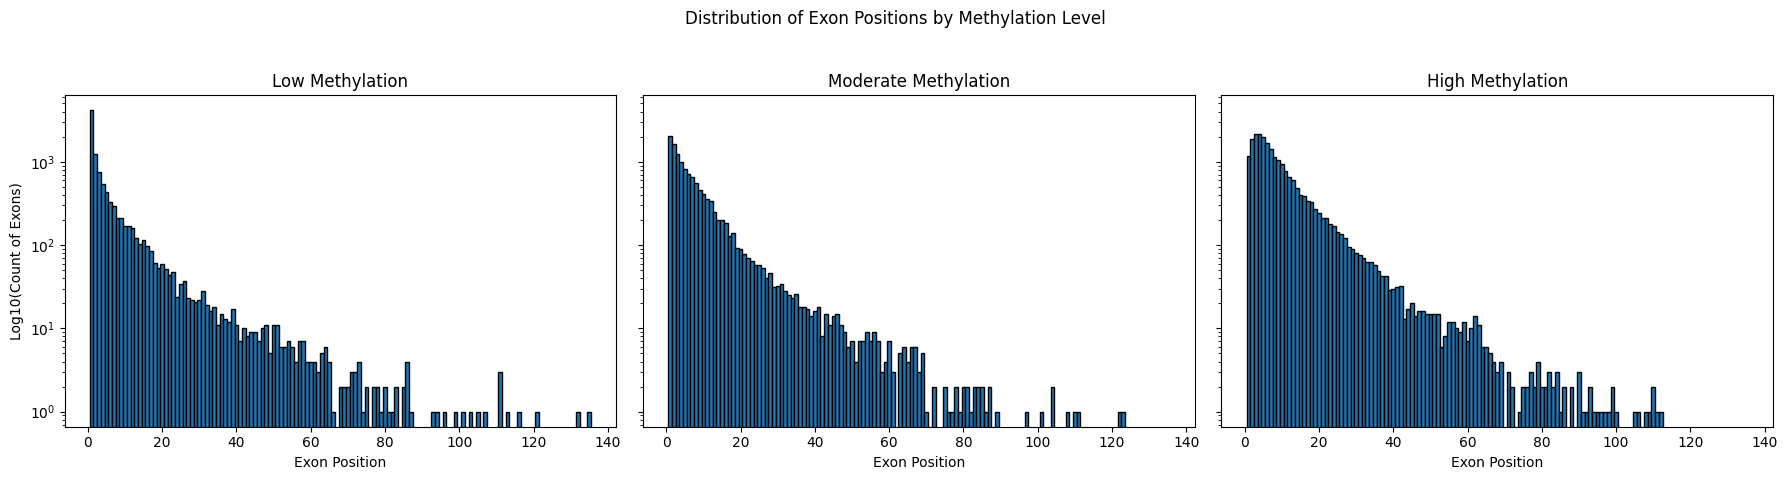

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load annotated methylation table
df = pd.read_csv('annotated_exon_methylation.csv', index_col=0)

# Extract exon position from exon_name (number after last dash)
def get_exon_pos(exon_name):
    if pd.isnull(exon_name):
        return None
    m = re.search(r'-(\d+)$', exon_name)
    return int(m.group(1)) if m else None

df['exon_position'] = df['exon_name'].apply(get_exon_pos)

# Drop missing positions
df = df.dropna(subset=['exon_position'])

# Plot histogram for each methylation level
levels = ['low', 'moderate', 'high']
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax, level in zip(axes, levels):
    sub = df[df['methylation_level'] == level]
    ax.hist(sub['exon_position'], bins=range(1, int(df['exon_position'].max())+2), align='left', edgecolor='black', log=True)
    ax.set_title(f'{level.capitalize()} Methylation')
    ax.set_xlabel('Exon Position')
    if ax is axes[0]:
        ax.set_ylabel('Log10(Count of Exons)')
plt.suptitle('Distribution of Exon Positions by Methylation Level')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('exon_position_hist_by_methylation_level.png')
plt.show()


/var/folders/xn/018g0hjx06n7dt_kb8nbq_jc0000gn/T/ipykernel_65252/2659057793.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['exon_position', 'methylation_level']).size().unstack(fill_value=0)[level_order]


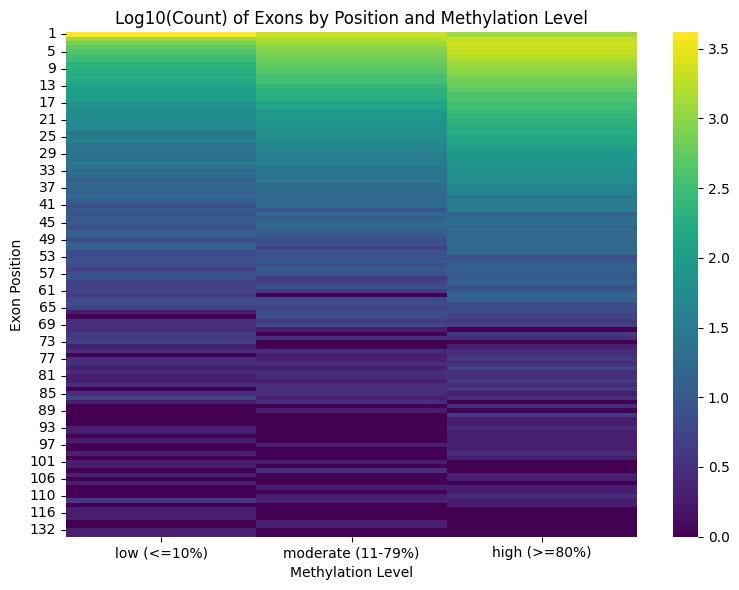

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

# Load your data
# Adjust the filename if needed
file = 'annotated_exon_methylation.csv'
df = pd.read_csv(file, index_col=0)

def get_exon_pos(exon_name):
    if pd.isnull(exon_name):
        return None
    m = re.search(r'-(\d+)$', exon_name)
    return int(m.group(1)) if m else None

if 'exon_position' not in df.columns:
    df['exon_position'] = df['exon_name'].apply(get_exon_pos)

df = df.dropna(subset=['exon_position'])

# Create a pivot table: rows=exon_position, columns=methylation_level, values=counts
level_order = ['low', 'moderate', 'high']
df['methylation_level'] = pd.Categorical(df['methylation_level'], categories=level_order, ordered=True)
heatmap_data = df.groupby(['exon_position', 'methylation_level']).size().unstack(fill_value=0)[level_order]

# Log-transform the counts for better visualization
heatmap_data_log = np.log10(heatmap_data + 1)

# Plot heatmap without annotation numbers
plt.figure(figsize=(8, 6))
ax = sns.heatmap(heatmap_data_log, cmap='viridis', annot=False)
plt.title('Log10(Count) of Exons by Position and Methylation Level')
# Custom x-axis labels
ax.set_xlabel('Methylation Level')
ax.set_ylabel('Exon Position')
ax.set_xticklabels([
    'low (<=10%)',
    'moderate (11-79%)',
    'high (>=80%)'
])
plt.tight_layout()
plt.savefig('exon_position_heatmap_by_methylation_level.png')
plt.show()


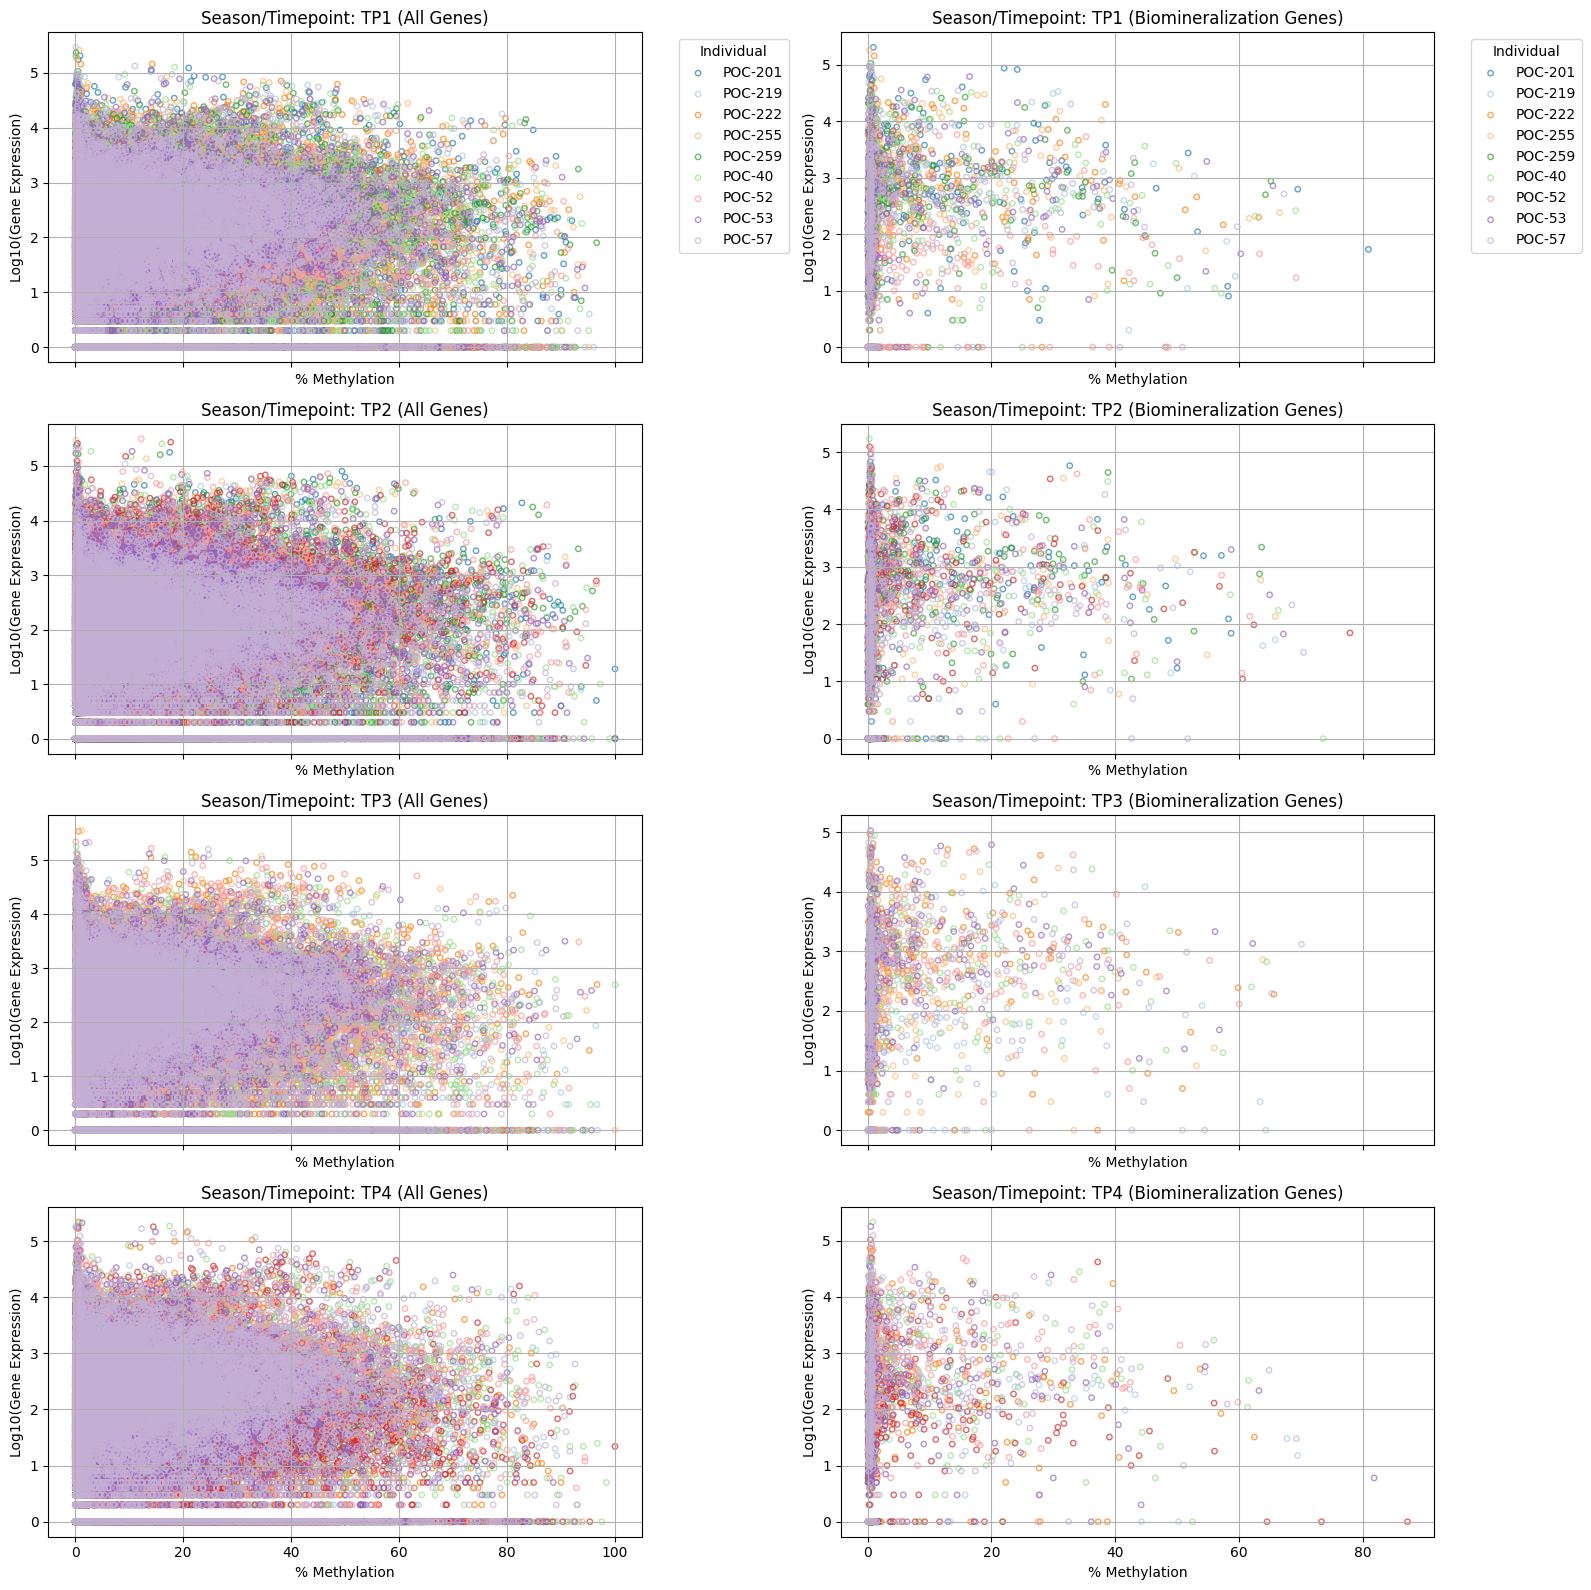

In [6]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


# Load gene expression data
expr_df = pd.read_csv('ptua-gene_count_matrix.csv', index_col=0)
# Load methylation data, fix gene name column
meth_df = pd.read_csv('Ptua_merged_perc_meth_filt75.txt', sep='\t')
meth_df.rename(columns={'gene': 'gene_id'}, inplace=True)
meth_df['gene_id'] = meth_df['gene_id'].str.replace('ID=', '', regex=False)
meth_df.set_index('gene_id', inplace=True)

# Find common genes
common_genes = expr_df.index.intersection(meth_df.index)
expr_common = expr_df.loc[common_genes]
meth_common = meth_df.loc[common_genes]

# Parse sample columns to get individual and timepoint
def parse_sample(sample):
    m = re.match(r'(POC-\d+)-(TP\d)', sample)
    if m:
        return m.group(1), m.group(2)
    return None, None

samples = [col for col in expr_common.columns if parse_sample(col)[0] is not None]
individuals = sorted(set(parse_sample(s)[0] for s in samples))
timepoints = sorted(set(parse_sample(s)[1] for s in samples))
colors = dict(zip(timepoints, ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']))

# Load biomin genes

# Load biomin genes and add 'gene-' prefix for matching
biomin_df = pd.read_csv('ptua_biomin_counts.csv')
biomin_genes = set('gene-' + gid for gid in biomin_df['gene_id'])

individual_colors = dict(zip(individuals, plt.cm.tab20.colors[:len(individuals)]))

# 4 rows (seasons), 2 columns (all genes, biomin genes)
fig, axes = plt.subplots(len(timepoints), 2, figsize=(16, 4*len(timepoints)), sharex='col')

for i, tp in enumerate(timepoints):
    # All genes subplot (col 0)
    ax_all = axes[i, 0]
    for ind in individuals:
        sample_name = f"{ind}-{tp}"
        if sample_name in expr_common.columns and sample_name in meth_common.columns:
            expr_vals = expr_common[sample_name]
            meth_vals = meth_common[sample_name]
            log_expr = np.log10(expr_vals + 1)
            ax_all.scatter(meth_vals, log_expr, alpha=0.7, label=ind, facecolors='none', edgecolors=individual_colors[ind], s=15)
    ax_all.set_title(f"Season/Timepoint: {tp} (All Genes)")
    ax_all.set_xlabel('% Methylation')
    ax_all.set_ylabel('Log10(Gene Expression)')
    ax_all.grid(True)
    if i == 0:
        ax_all.legend(title='Individual', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Biomin genes subplot (col 1)
    ax_biomin = axes[i, 1]
    for ind in individuals:
        sample_name = f"{ind}-{tp}"
        if sample_name in expr_common.columns and sample_name in meth_common.columns:
            # Only keep biomin genes
            expr_vals_bio = expr_common.loc[expr_common.index.isin(biomin_genes), sample_name]
            meth_vals_bio = meth_common.loc[meth_common.index.isin(biomin_genes), sample_name]
            log_expr_bio = np.log10(expr_vals_bio + 1)
            ax_biomin.scatter(meth_vals_bio, log_expr_bio, alpha=0.7, label=ind, facecolors='none', edgecolors=individual_colors[ind], s=15)
    ax_biomin.set_title(f"Season/Timepoint: {tp} (Biomineralization Genes)")
    ax_biomin.set_xlabel('% Methylation')
    ax_biomin.set_ylabel('Log10(Gene Expression)')
    ax_biomin.grid(True)
    if i == 0:
        ax_biomin.legend(title='Individual', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('correlation_plot_by_season_and_biomin.png', bbox_inches='tight')
plt.show()


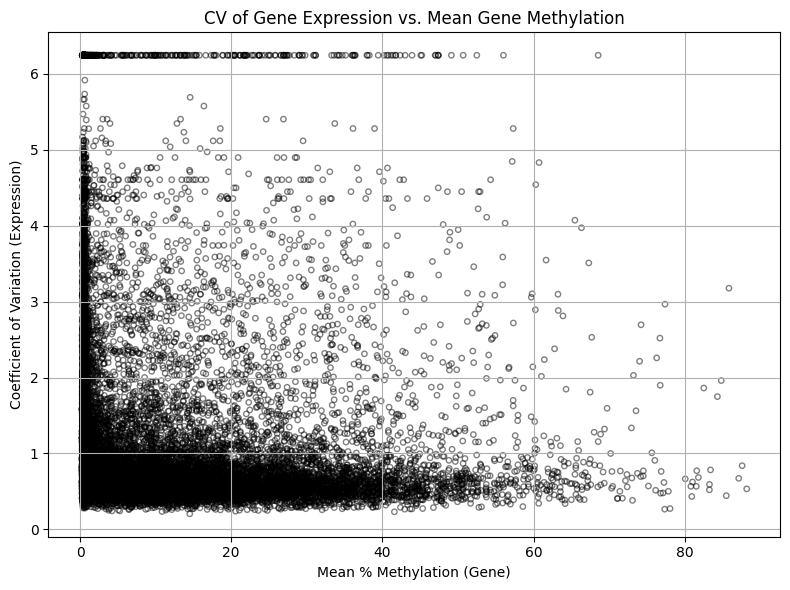

In [7]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load gene expression data
expr_df = pd.read_csv('ptua-gene_count_matrix.csv', index_col=0)

# Load methylation data
meth_df = pd.read_csv('Ptua_merged_perc_meth_filt75.txt', sep='\t')
meth_df.rename(columns={'gene': 'gene_id'}, inplace=True)
meth_df['gene_id'] = meth_df['gene_id'].str.replace('ID=', '', regex=False)
meth_df.set_index('gene_id', inplace=True)

# Find common genes
common_genes = expr_df.index.intersection(meth_df.index)
expr_common = expr_df.loc[common_genes]
meth_common = meth_df.loc[common_genes]

# Coefficient of variation (CV) for gene expression across samples
cv_expr = expr_common.std(axis=1) / expr_common.mean(axis=1)

# Mean methylation across samples
mean_meth = meth_common.mean(axis=1)

# Plot CV of expression vs. mean methylation
plt.figure(figsize=(8,6))
plt.scatter(mean_meth, cv_expr, alpha=0.5, edgecolors='k', facecolors='none', s=15)
plt.xlabel('Mean % Methylation (Gene)')
plt.ylabel('Coefficient of Variation (Expression)')
plt.title('CV of Gene Expression vs. Mean Gene Methylation')
plt.grid(True)
plt.tight_layout()
plt.savefig('cv_expression_vs_mean_methylation.png')
plt.show()


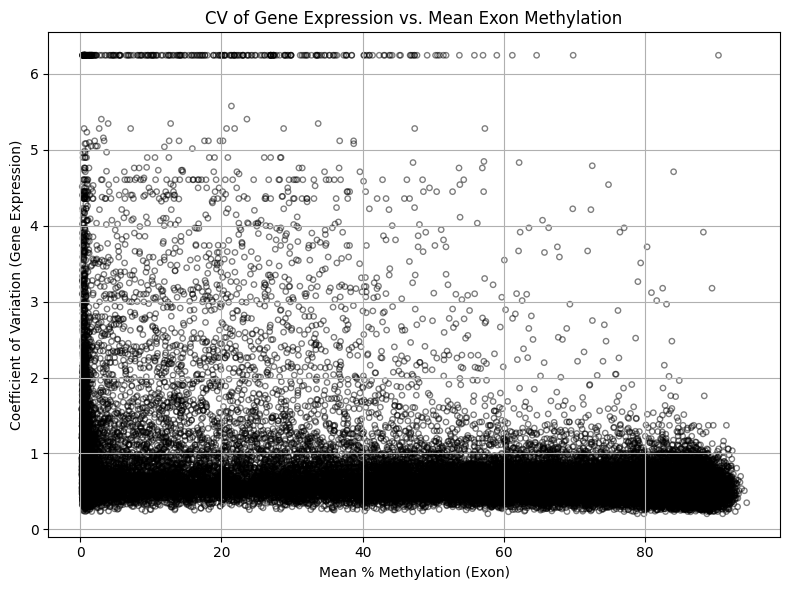

In [8]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Load gene expression data
expr_df = pd.read_csv('ptua-gene_count_matrix.csv', index_col=0)

# Load exon methylation data
exon_meth_df = pd.read_csv('Ptua_exon_merged_perc_meth_filt75.txt', sep='\t')

# Parse exon names to extract parent gene
exon_meth_df['parent_gene'] = exon_meth_df['gene'].apply(lambda x: 'gene-' + re.search(r'Parent=mrna-([^;]+)', x).group(1) if re.search(r'Parent=mrna-([^;]+)', x) else None)
exon_meth_df = exon_meth_df.dropna(subset=['parent_gene'])

# Only keep exons whose parent gene is in expression data
genes_in_expr = set(expr_df.index)
exon_meth_df = exon_meth_df[exon_meth_df['parent_gene'].isin(genes_in_expr)]

# Get sample columns
sample_cols = [col for col in exon_meth_df.columns if re.match(r'POC-\d+-TP\d', col)]

# Mean % methylation for each exon
mean_exon_meth = exon_meth_df[sample_cols].mean(axis=1)
# CV of gene expression for parent gene
parent_gene_means = expr_df.loc[exon_meth_df['parent_gene']].mean(axis=1)
parent_gene_stds = expr_df.loc[exon_meth_df['parent_gene']].std(axis=1)
cv_expr = parent_gene_stds / parent_gene_means

# Combine into a DataFrame for filtering
# Reset index to avoid duplicate labels
plot_df = pd.DataFrame({
	'mean_exon_meth': mean_exon_meth.values,
	'cv_expr': cv_expr.values,
	'parent_gene_means': parent_gene_means.values
})
# Filter: remove exons with zero or missing mean expression or mean methylation
plot_df = plot_df[(plot_df['mean_exon_meth'] > 0) & (plot_df['parent_gene_means'] > 0) & (~plot_df['mean_exon_meth'].isna()) & (~plot_df['cv_expr'].isna())]

# Plot: x = mean % methylation (exon), y = CV of gene expression
plt.figure(figsize=(8,6))
plt.scatter(plot_df['mean_exon_meth'], plot_df['cv_expr'], alpha=0.5, edgecolors='k', facecolors='none', s=15)
plt.xlabel('Mean % Methylation (Exon)')
plt.ylabel('Coefficient of Variation (Gene Expression)')
plt.title('CV of Gene Expression vs. Mean Exon Methylation')
plt.grid(True)
plt.tight_layout()
plt.savefig('cv_expression_vs_mean_exon_methylation.png')
plt.show()


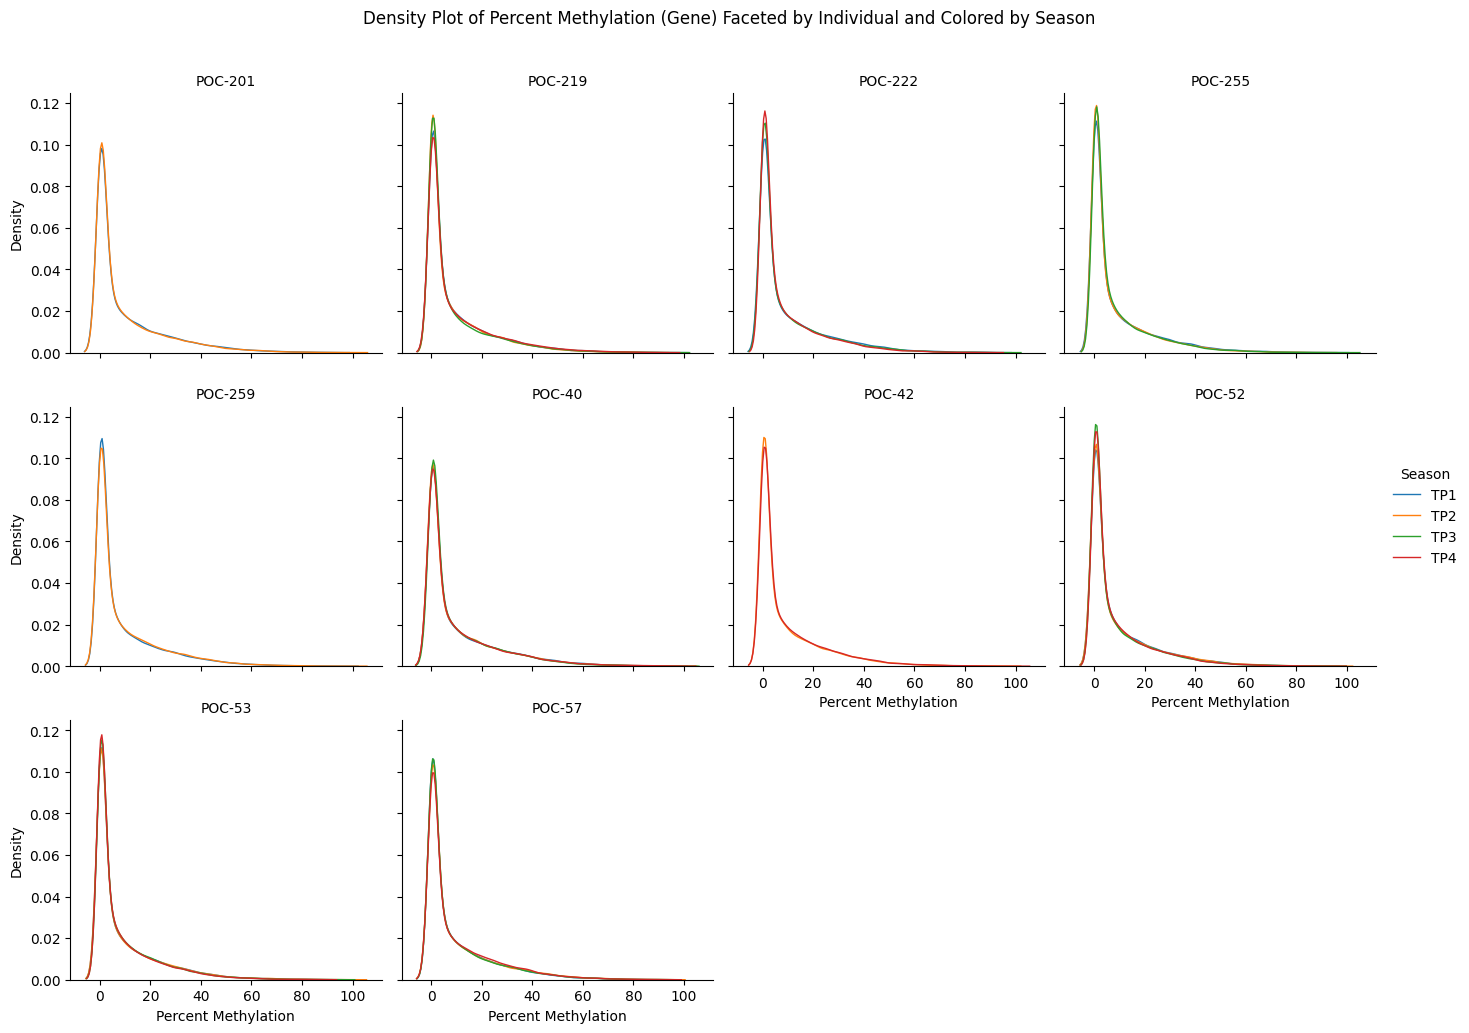

In [9]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load methylation data
gene_meth_df = pd.read_csv('Ptua_merged_perc_meth_filt75.txt', sep='\t')

gene_meth_long = gene_meth_df.melt(id_vars=['gene'], var_name='Sample', value_name='Percent_Methylation')

gene_meth_long = gene_meth_long.dropna(subset=['Percent_Methylation'])

gene_meth_long['Individual'] = gene_meth_long['Sample'].apply(lambda x: re.sub(r'-TP\d+$', '', x))
gene_meth_long['Season'] = gene_meth_long['Sample'].apply(lambda x: re.search(r'(TP\d+)$', x).group(1) if re.search(r'(TP\d+)$', x) else 'NA')

g = sns.FacetGrid(gene_meth_long, col='Individual', col_wrap=4, sharex=True, sharey=True, height=3.5, hue='Season', palette='tab10')
g.map(sns.kdeplot, 'Percent_Methylation', fill=False, linewidth=1)
g.add_legend(title='Season')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Percent Methylation', 'Density')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Density Plot of Percent Methylation (Gene) Faceted by Individual and Colored by Season')
plt.savefig('gene_methylation_density_by_individual_and_season.png', bbox_inches='tight')
plt.show()


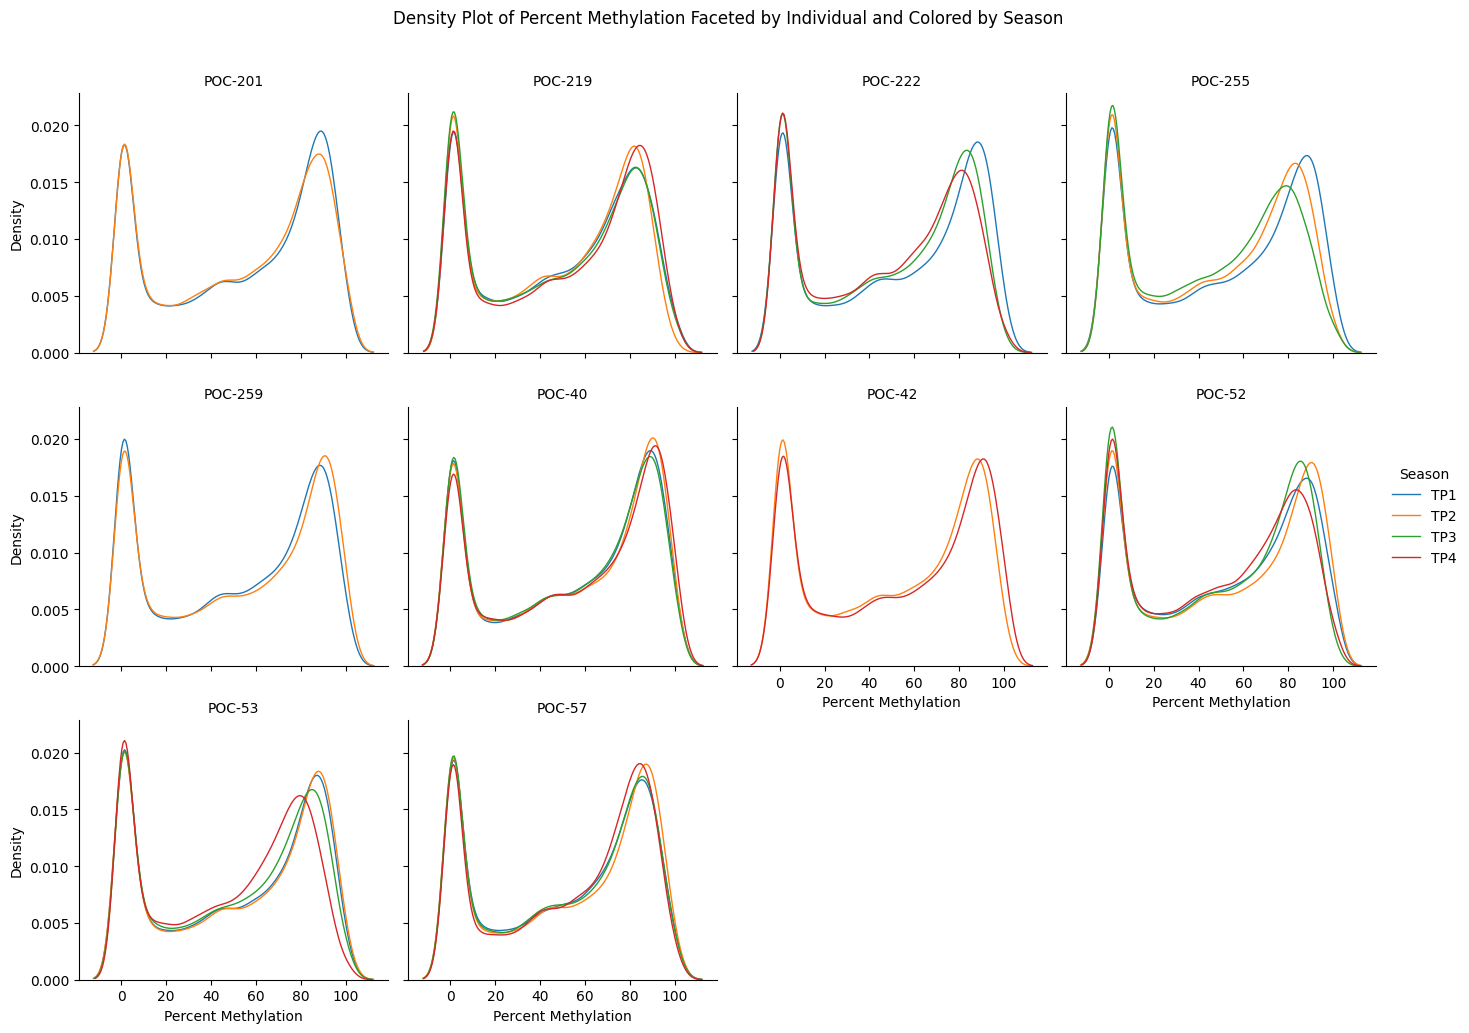

In [11]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load methylation data
meth_df = pd.read_csv('Ptua_exon_merged_perc_meth_filt75.txt', sep='\t')

# Remove 'gene' column for melting
meth_long = meth_df.melt(id_vars=['gene'], var_name='Sample', value_name='Percent_Methylation')

# Remove NA values
meth_long = meth_long.dropna(subset=['Percent_Methylation'])
    
# Extract individual (remove -TP suffix) and season (TP suffix)
meth_long['Individual'] = meth_long['Sample'].apply(lambda x: re.sub(r'-TP\d+$', '', x))
meth_long['Season'] = meth_long['Sample'].apply(lambda x: re.search(r'(TP\d+)$', x).group(1) if re.search(r'(TP\d+)$', x) else 'NA')

# Facet by individual, color by season
g = sns.FacetGrid(meth_long, col='Individual', col_wrap=4, sharex=True, sharey=True, height=3.5, hue='Season', palette='tab10')
g.map(sns.kdeplot, 'Percent_Methylation', fill=False, linewidth=1)
g.add_legend(title='Season')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Percent Methylation', 'Density')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Density Plot of Percent Methylation Faceted by Individual and Colored by Season')
plt.savefig('exon_methylation_density_by_individual_and_season.png', bbox_inches='tight')
plt.show()
